Test MSE: 0.002


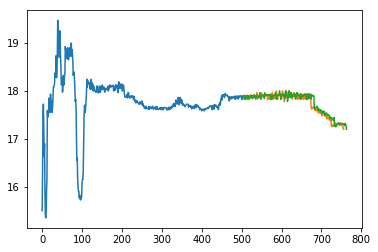

In [96]:
from sklearn.metrics import mean_squared_error
import pandas
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('USD_EGP Historical Data.csv')
data=data.drop('Change %',axis=1)
data=data.drop('Date',axis=1)
data=data[5686:] #choosing the data after floating the egyptian pound only
working_data=data.ix[:,1]#choosing the price coloumn only
#print(working_data)
#print(data)
#plt.plot(data)


dataframe = pandas.concat([working_data.shift(1), working_data], axis=1)
dataframe.columns = ['t', 't+1']
#print(dataframe.head(5))


X=dataframe.values
train_size = int(len(X) * 0.67)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
#print(train_size)



test_score = mean_squared_error(test_y, test_X)
print('Test MSE: %.3f' % test_score)


pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()

In [107]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(working_data.reshape(-1, 1))
#print(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
#print(len(train), len(test))


def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


C:\Users\Ghandour\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


TypeError: while_loop() got an unexpected keyword argument 'maximum_iterations'